In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = "../base_data/infos.npz"
data_all = np.load(data_path)

data_actions = data_all["actions"]
data_positions = data_all["positions"]
data_angles = data_all["angles"]
data_rewards = data_all["rewards"]
data_dones = data_all["dones"]

In [3]:
data_dones.shape

(30000,)

In [4]:
episode_lengths = []

episode_length = 0

for i, done in enumerate(data_dones):
    episode_length += 1
    if done:
        episode_lengths.append(episode_length)
        episode_length = 0

In [5]:
len(episode_lengths)

241

In [6]:
np.mean(episode_lengths)

124.15352697095436

In [7]:
np.min(episode_lengths)

3

In [8]:
np.max(episode_lengths)

300

In [9]:
np.std(episode_lengths)

99.62225999610027

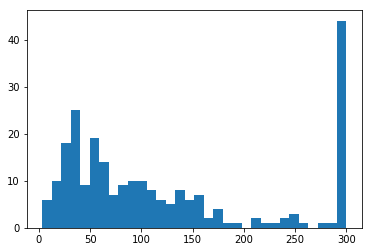

In [14]:
plt.hist(episode_lengths, bins=32)
plt.show()

In [23]:
np.sum(np.array(episode_lengths) > 30)

207

In [29]:
batch_size = 20
batch_count = 0

for episode_length in episode_lengths:
    batch_count += (episode_length // batch_size)
    
print(batch_count)
print(batch_count * batch_size)

print( (batch_count * batch_size) / len(data_dones))

1397
27940
0.9313333333333333


- バッチサイズを20にして、余分なものを捨てるとすると、93%が使える
- バッチサイズを30にして、余分なものを捨てるとすると、90%が使える